In [381]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [382]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [383]:
import pandas as pd
import numpy as np

In [384]:
df1 = pd.read_csv('/content/drive/MyDrive/499A_Project/Cola/cola_train_400.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

df2 = pd.read_csv('/content/drive/MyDrive/499A_Project/Cola/cola_test_100.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

In [385]:
print(df1.head())

                                        text  label
0                            I, I like beer.      0
1                          John wrote books.      0
2                      Better you not drink.      0
3                            The string cut.      0
4  Constant reading Shakespeare satisfied me      0


In [386]:
print(df2.head())

                                                text  label
0                     John has taken to the library.      0
1  Bill left when that no one else was awake is c...      0
2                         We offered her with a job.      0
3                            John coughed the money.      0
4                            The book sent to Peter.      0


In [387]:
df1.label[df1.label == 1]="TRUE"
df1.label[df1.label == 0]="FALSE"

df2.label[df2.label == 1]="TRUE"
df2.label[df2.label == 0]="FALSE"

<ipython-input-387-af82ade73374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[df1.label == 1]="TRUE"
<ipython-input-387-af82ade73374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 1]="TRUE"


In [388]:
# taking acceptable and deleting unacceptable
df3 = df1[~df1.label.str.contains('TRUE')]
df3 = df3.sample(n=200, replace=True)
df3["label"].value_counts()

FALSE    200
Name: label, dtype: int64

In [389]:
# taking acceptable and deleting unacceptable
df4 = df1[~df1.label.str.contains('FALSE')]
df4 = df4.sample(n=200, replace=True)
df4["label"].value_counts()

TRUE    200
Name: label, dtype: int64

In [390]:
frames = [df3, df4]

temp = pd.concat(frames)

In [391]:
temp["label"].value_counts()

FALSE    200
TRUE     200
Name: label, dtype: int64

In [392]:
# taking acceptable and deleting unacceptable
df5 = df2[~df2.label.str.contains('TRUE')]
df5 = df5.sample(n=50, replace=True)
df5["label"].value_counts()

FALSE    50
Name: label, dtype: int64

In [393]:
# taking acceptable and deleting unacceptable
df6 = df2[~df2.label.str.contains('FALSE')]
df6 = df6.sample(n=50, replace=True)
df6["label"].value_counts()

TRUE    50
Name: label, dtype: int64

In [394]:
frames2 = [df5, df6]

temp2 = pd.concat(frames2)

In [395]:
temp2["label"].value_counts()

FALSE    50
TRUE     50
Name: label, dtype: int64

In [396]:
frames3 = [df3, df4, df5, df6]

temp3 = pd.concat(frames3)

In [397]:
temp3["label"].value_counts()

FALSE    250
TRUE     250
Name: label, dtype: int64

In [398]:
text1 = temp3['text']+temp3['text']
emotion= temp3['label'].tolist()
text=text1.values.tolist()

In [399]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [400]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

400
400
100
100


In [401]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [402]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [403]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 15
	95percentile : 31
	99percentile : 41


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 25
	99percentile : 31


In [404]:
model = t.get_classifier()

In [405]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [406]:
# from transformers import BertTokenizer, BertModel

# model_name = 'bert-base-uncased'
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

# num_layers = model.config.num_hidden_layers
# print(f'The number of layers in the model is: {num_layers}')

In [407]:
# model = t.get_classifier()
# for i in range(1):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = False

# print(f'Layer {i} is trainable: {layer.trainable}')


In [408]:
# for j in range(2):
#      layer = model.bert.encoder.layer[j]
#      layer.trainable = False
# print(f'Layer {j} is trainable: {layer.trainable}')

In [409]:
# list = list(range(1,8))
# print(list)
# for k in range(3):
#      model.bert.encoder.layer[k].trainable = False
# # for p in range(12):
# #      model.bert.encoder.layer[p].trainable = False

# if list == k:
#  print(f'Layer {list} is trainable: {layer.trainable}')
# else:
#   print(f'Layer {i} is trainable: {not layer.trainable}')

   

In [410]:
# print(f'Layer {i} is trainable: {layer.trainable}')
# print(f'Layer {j} is trainable: {layer.trainable}')
# print(f'Layer {k} is trainable: {layer.trainable}')

In [411]:
# print(f'Layer is {0,1,2} trainable: {layer.trainable}')
# print(f'Layer is {312} trainable: {layer.trainable}')

In [412]:
# model = t.get_classifier()
# for i in range(10,11,13):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = False
# print(f'Layer {i,i + 1, i + 3}  is trainable: {layer.trainable}')

# for j in range (j != (i,i + 1, i + 3)):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = True
     
# print(f'Layer {j+10}  is trainable: {layer.trainable}')
# for j in range(2):
#      layer = model.bert.encoder.layer[j]
#      layer.trainable = False
# print(f'Layer {j + 1} is trainable: {layer.trainable}')
# for k in range(3):
#      layer = model.bert.encoder.layer[k]
#      layer.trainable = False
# print(f'Layer {k + 1} is trainable: {layer.trainable}')
# layer = model.bert.encoder.layer[4]
# print(f'Layer is {1,2,3} trainable: {layer.trainable}')

In [413]:
# model = t.get_classifier()
# for i in range(10):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = False
# print(f'Layer {i} is trainable: {layer.trainable}')
# for j in range(11):
#      layer = model.bert.encoder.layer[j]
#      layer.trainable = False
# print(f'Layer {j} is trainable: {layer.trainable}')
# for k in range(12):
#      layer = model.bert.encoder.layer[k]
#      layer.trainable = False
# print(f'Layer {k} is trainable: {layer.trainable}')


In [414]:
# print(f'Layer {i} is trainable: {layer.trainable}')
# print(f'Layer {j} is trainable: {layer.trainable}')
# print(f'Layer {k} is trainable: {layer.trainable}')

In [415]:
model = t.get_classifier()
trainable_layers = []
non_trainable_layers = []

for i in range(12):
     layer = model.bert.encoder.layer[i]
     layer.trainable = True
     trainable_layers.append(i)

print(f'The number of trainable layers in the model is: {len(trainable_layers)}')
print(f'The trainable layers before freezing are: {trainable_layers}')
print(f'The number of non-trainable layers after freezing in the model is: {len(non_trainable_layers)}')
print(f'The non-trainable layers are: {non_trainable_layers}')


The number of trainable layers in the model is: 12
The trainable layers before freezing are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The number of non-trainable layers after freezing in the model is: 0
The non-trainable layers are: []


In [416]:
# model = t.get_classifier()
# trainable_layers = []
# non_trainable_layers = []
# for i in range(10):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = False
#      trainable_layers.append(i)
# for i in range(9,12):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = True
#      non_trainable_layers.append(i)
     
# for i in range(9):
#      layer = model.bert.encoder.layer[i]
#      layer.trainable = False
#      trainable_layers.append(i)

# num_trainable_layers = len(trainable_layers)
# num_not_trainable_layers = len(non_trainable_layers)

# print(f'The number of trainable layers in the model is: {num_trainable_layers}')
# print(f'The trainable layers before freezing are: {trainable_layers}')
# print(f'The number of non-trainable layers after freezing in the model is: {num_not_trainable_layers}')
# print(f'The non-trainable layers are: {non_trainable_layers}')

In [417]:
# trainable_layers = []
# non_trainable_layers = []
# for i, layer in enumerate(model.bert.encoder.layer):
#     if layer.trainable:
#         trainable_layers.append(i)
#     else:
#         non_trainable_layers.append(i)

# num_trainable_layers = len(trainable_layers)
# num_not_trainable_layers = len(non_trainable_layers)

# print(f'The number of trainable layers in the model is: {num_trainable_layers}')
# print(f'The trainable layers before freezing are: {trainable_layers}')
# print(f'The number of non-trainable layers after freezing in the model is: {num_not_trainable_layers}')
# print(f'The non-trainable layers are: {non_trainable_layers}')

In [418]:
# trainable_layers = []
# non_trainable_layers = []

# for i, layer in enumerate(model.bert.encoder.layer):
#     if layer.trainable:
#         trainable_layers.append(i)
#     else:
#         non_trainable_layers.append(i)
       
# num_trainable_layers = len(trainable_layers)
# num_not_trainable_layers = len(non_trainable_layers)

# print(f'The number of trainable layers in the model is: {num_trainable_layers}')
# print(f'The trainable layers before freezing are: {trainable_layers}')
# print(f'The number of non-trainable layers after freezing in the model is: {num_not_trainable_layers}')
# print(f'The non-trainable layers are: {non_trainable_layers}')

In [419]:
# print(f'The number of layers in the model is: {num_layers}')

In [420]:
# model = t.get_classifier()

# for layer in model.layers[:6]:
#     layer.trainable = False

# print(f'Layer {i} is trainable: {layer.trainable}')

In [421]:
# for layer in model.layers[:4]:
#     layer.trainable = False

In [422]:
# for i, layer in enumerate(model.layers[:4]):
#   print(f'Layer {i} is trainable: {layer.trainable}')

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 69s 669ms/step - loss: 24.0855 - accuracy: 0.5106


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


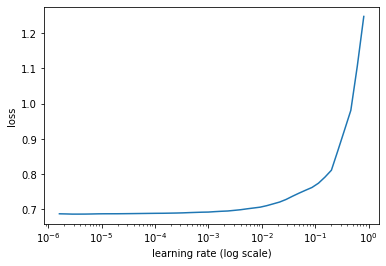

In [423]:
learner.lr_find(show_plot=True, max_epochs=1)

In [424]:
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
67/67 [==============================] - 66s 764ms/step - loss: 0.6850 - accuracy: 0.5700 - val_loss: 0.6774 - val_accuracy: 0.6500
Epoch 2/10
67/67 [==============================] - 48s 711ms/step - loss: 0.6485 - accuracy: 0.6400 - val_loss: 0.5973 - val_accuracy: 0.6900
Epoch 3/10
67/67 [==============================] - 48s 715ms/step - loss: 0.4508 - accuracy: 0.8125 - val_loss: 0.4779 - val_accuracy: 0.8000
Epoch 4/10
67/67 [==============================] - 48s 712ms/step - loss: 0.2456 - accuracy: 0.9150 - val_loss: 0.4162 - val_accuracy: 0.8600
Epoch 5/10
67/67 [==============================] - 48s 713ms/step - loss: 0.1151 - accuracy: 0.9675 - val_loss: 0.5901 - val_accuracy: 0.8100
Epoch 6/10
67/67 [==============================] - 48s 714ms/step - loss: 0.1036 - accuracy: 0.9725 - val_loss: 0.4535 - val_accuracy: 0.8300
Epoch 7/10
67/67 [==============================] - 48s 711ms/step - loss: 0.05

In [425]:
class_names=["acpt","unac"]

In [426]:
learner.validate(val_data=(val), class_names=class_names)

4/4 [==============================] - 3s 114ms/step
              precision    recall  f1-score   support

        acpt       0.98      0.78      0.87        51
        unac       0.81      0.98      0.89        49

    accuracy                           0.88       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.88      0.88       100



array([[40, 11],
       [ 1, 48]])

simulating training for different learning rates... this may take a few moments...
66/66 [==============================] - 28s 416ms/step - loss: 0.2306 - accuracy: 0.9145


/usr/local/lib/python3.8/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


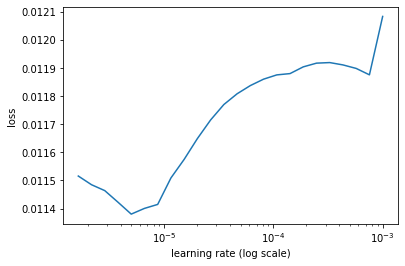

In [427]:
learner.lr_find(show_plot=True, max_epochs=1)

In [428]:
import matplotlib.pyplot as plt

In [429]:

def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

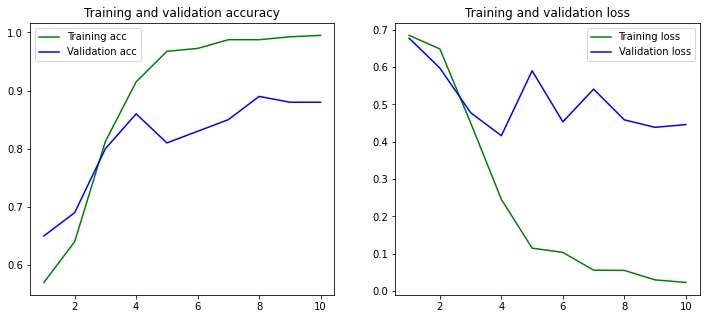

In [430]:
PlotGraph(history)

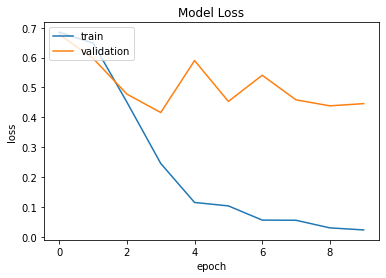

In [431]:
learner.plot('loss')